In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('churn_train.csv')
test_data=pd.read_csv('churn_test.csv')

In [5]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [10]:
test_data.shape

(667, 20)

## Now we will check whether there are any NA values in the data or not.

In [4]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## As there are no NA values in the dataset, thus data cleaning is not required.

## At first we will convert the categorical data into numerical format using encoding.


In [5]:
data.loc[data['International plan']=='No','International plan']=0
data.loc[data['International plan']=='Yes','International plan']=1
data.loc[data['Voice mail plan']=='No','Voice mail plan']=0
data.loc[data['Voice mail plan']=='Yes','Voice mail plan']=1
data['International plan']=data['International plan'].astype(int)
data['Voice mail plan']=data['Voice mail plan'].astype(int)
data.loc[data['Churn']=='False','Churn']=0
data.loc[data['Churn']=='True','Churn']=1
data['Churn']=data['Churn'].astype(int)

In [6]:
test_data.loc[test_data['International plan']=='No','International plan']=0
test_data.loc[test_data['International plan']=='Yes','International plan']=1
test_data.loc[test_data['Voice mail plan']=='No','Voice mail plan']=0
test_data.loc[test_data['Voice mail plan']=='Yes','Voice mail plan']=1
test_data['International plan']=test_data['International plan'].astype(int)
test_data['Voice mail plan']=test_data['Voice mail plan'].astype(int)
test_data.loc[test_data['Churn']=='False','Churn']=0
test_data.loc[test_data['Churn']=='True','Churn']=1
test_data['Churn']=test_data['Churn'].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int32  
 4   Voice mail plan         2666 non-null   int32  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## We'll now directly apply our model to the unprocessed training and validation data in order to evaluate the accuracy. Next, we'll apply feature selection on our dataset and then apply the model again and compare the accuracy.

## APPLYING ARTIFICIAL NEURAL NETWORKS

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
x=data.iloc[:,1:19]
x

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [10]:
y=data.iloc[:,19:20]
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


In [11]:
x_test=test_data.iloc[:,1:19]
y_test=test_data.iloc[:,19:20]

In [116]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [117]:
x_train.shape

(1866, 18)

In [118]:
x_val.shape

(800, 18)

In [119]:
from keras import models,layers

In [120]:
network=models.Sequential()
network.add(layers.Dense(512,activation='leaky_relu',input_shape=(1*18,)))
network.add(layers.Dense(128,activation='leaky_relu',input_shape=(1*18,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [121]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
network.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 2s 15ms/step - loss: 10.1962 - accuracy: 0.7262 - val_loss: 3.6807 - val_accuracy: 0.8712
Epoch 2/50
59/59 [==============================] - 0s 6ms/step - loss: 4.0597 - accuracy: 0.7422 - val_loss: 1.3137 - val_accuracy: 0.6812
Epoch 3/50
59/59 [==============================] - 0s 6ms/step - loss: 2.2039 - accuracy: 0.7626 - val_loss: 0.6112 - val_accuracy: 0.8700
Epoch 4/50
59/59 [==============================] - 0s 6ms/step - loss: 1.5463 - accuracy: 0.7712 - val_loss: 2.2625 - val_accuracy: 0.8712
Epoch 5/50
59/59 [==============================] - 0s 6ms/step - loss: 1.0176 - accuracy: 0.7824 - val_loss: 0.3434 - val_accuracy: 0.8825
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.7277 - accuracy: 0.8028 - val_loss: 0.9982 - val_accuracy: 0.8712
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5956 - accuracy: 0.8092 - val_loss: 0.7362 - val_accuracy: 0.6675
Epoch 8/50
59/59 [

In [125]:
score=network.evaluate(x_test,y_test)
score

21/21 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9085


[0.2764137089252472, 0.908545732498169]

## So without any feature selection and standardisation, by directly applying Neural Networks over the unprocessed data, We are getting the accuracy of 89% on training data and 90% on testing data.

## Performing EDA

In [126]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
International plan,2666.0,0.101275,0.301750,0.00,0.0000,0.00,0.000,1.00
Voice mail plan,2666.0,0.274944,0.446570,0.00,0.0000,0.00,1.000,1.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00


array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'International plan'}>,
        <AxesSubplot:title={'center':'Voice mail plan'}>],
       [<AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>],
       [<AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>,
        <AxesSubplot:title={'center':'Total eve charge'}>,
        <AxesSubplot:title={'center':'Total night minutes'}>],
       [<AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>,
        <AxesSubplot:title={'center':'Total intl minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>],
       [<AxesSubplot:title={'center':'Total int

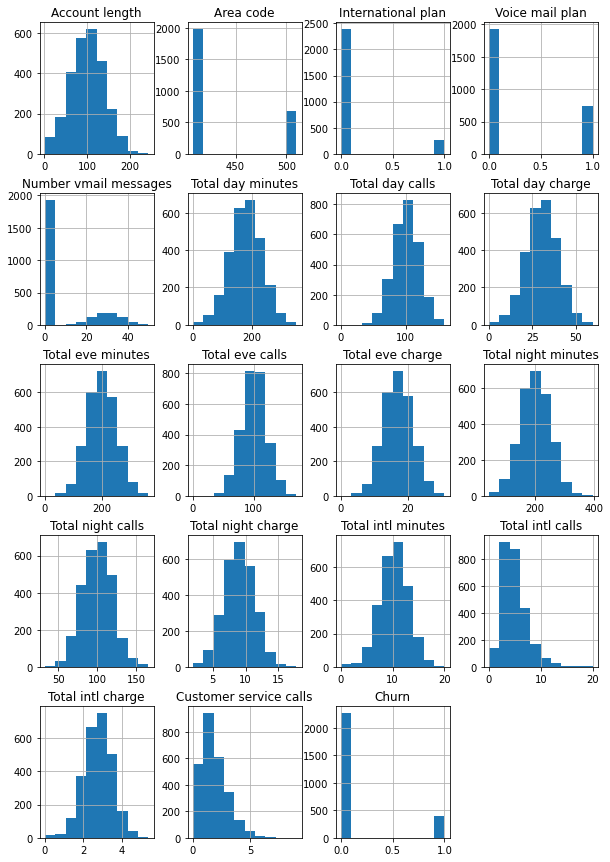

In [127]:
data.hist(figsize=(10,15))

In [128]:
filtered_data = data.loc[(data['International plan'] == 0) & (data['Voice mail plan'] == 0), 'Churn']

In [129]:
filtered_data.count()

1738

<AxesSubplot:>

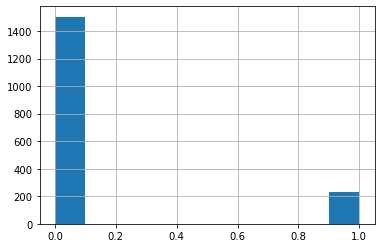

In [130]:
filtered_data.hist()

## Top 5 states with most users and their count of churn

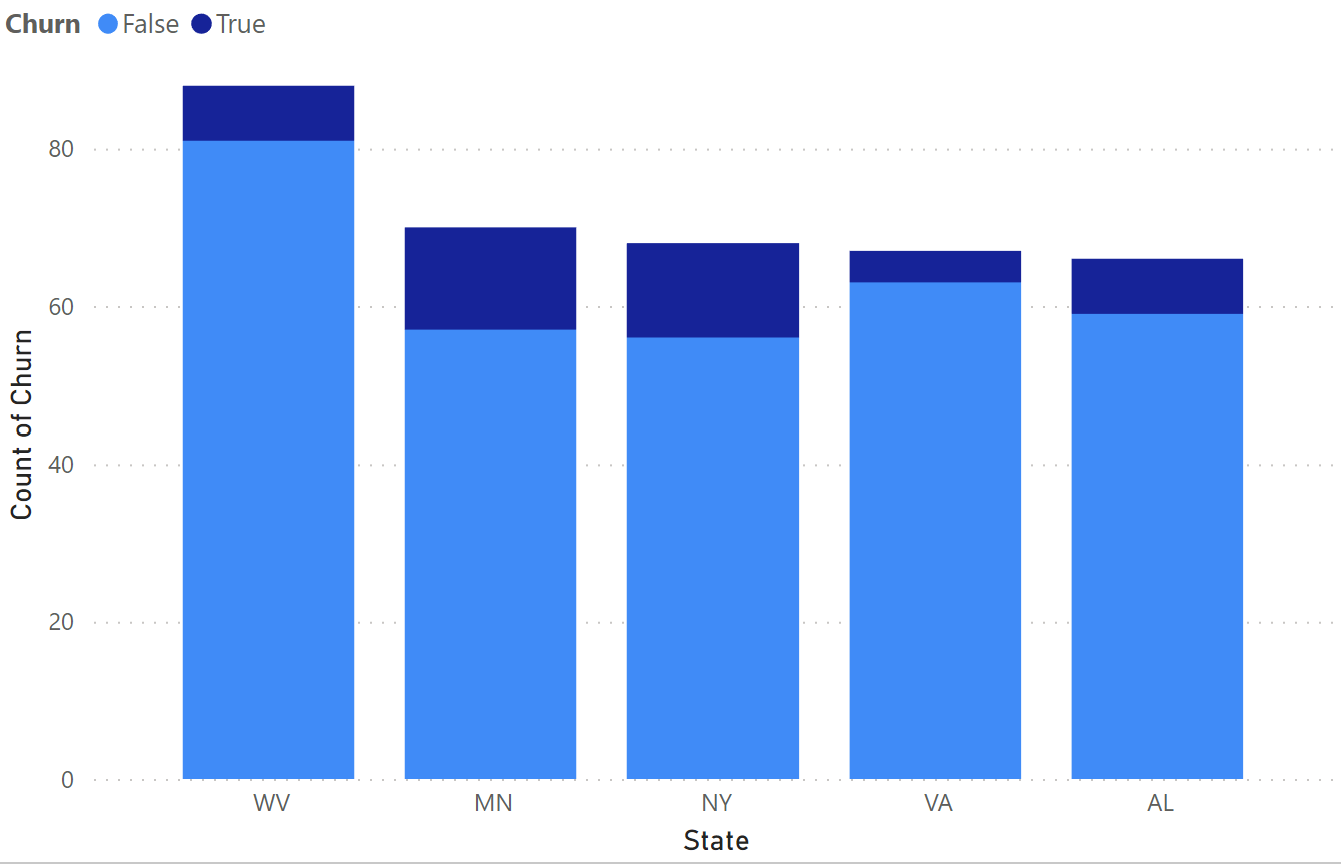

## Percentage of customers that are churning and not churning

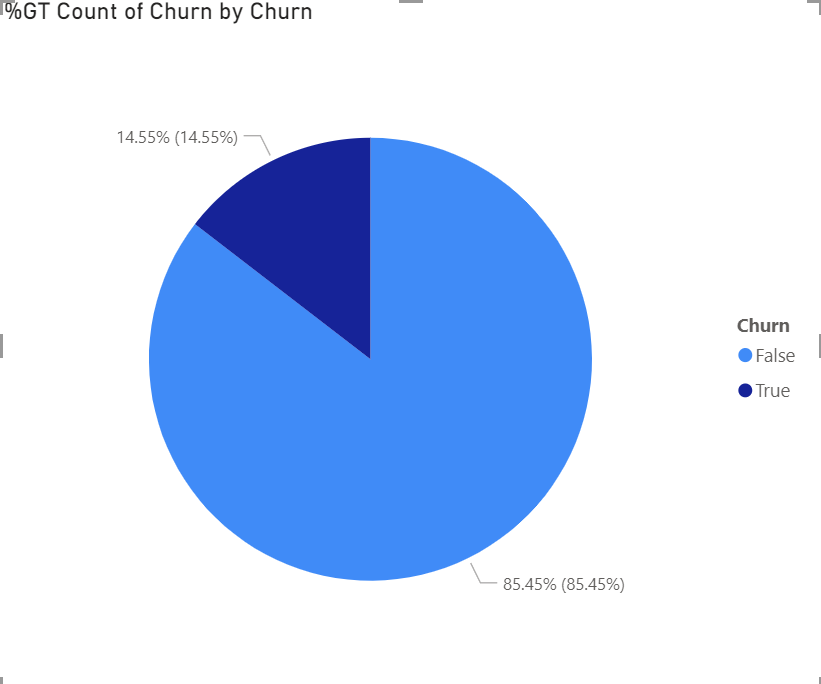

<AxesSubplot:>

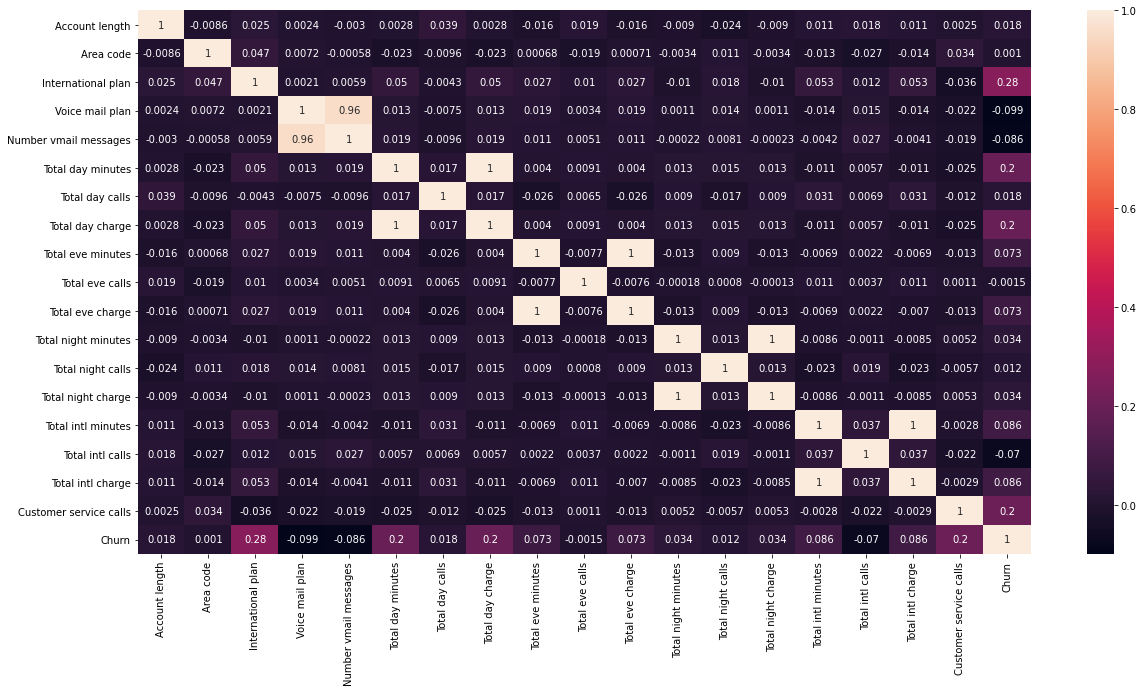

In [131]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [132]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [133]:
corr_features=correlation(data,0.7)
len(set(corr_features))

5

In [134]:
corr_features

{'Number vmail messages',
 'Total day charge',
 'Total eve charge',
 'Total intl charge',
 'Total night charge'}

In [135]:
data=data.drop(corr_features,axis=1)
test_data=test_data.drop(corr_features,axis=1)

In [136]:
data

,State,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,0
2662,AZ,192,415,0,1,156.2,77,215.5,126,279.1,83,9.9,6,2,0
2663,WV,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
2664,RI,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0


## Now, we removed 5 features from the dataset that are highly correlated. 

In [137]:
x=data.iloc[:,1:15]
x

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,0
2662,192,415,0,1,156.2,77,215.5,126,279.1,83,9.9,6,2,0
2663,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
2664,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0


In [138]:
y=data.iloc[:,14:15]
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


In [139]:
x_test=test_data.iloc[:,1:15]
y_test=test_data.iloc[:,14:15]

In [140]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [141]:
x_train.shape

(1866, 14)

In [142]:
network=models.Sequential()
network.add(layers.Dense(512,activation='leaky_relu',input_shape=(1*14,)))
network.add(layers.Dense(128,activation='leaky_relu',input_shape=(1*14,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [143]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
network.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 2s 11ms/step - loss: 6.8061 - accuracy: 0.7395 - val_loss: 4.3044 - val_accuracy: 0.8525
Epoch 2/50
59/59 [==============================] - 0s 6ms/step - loss: 2.6203 - accuracy: 0.7605 - val_loss: 1.6758 - val_accuracy: 0.8525
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 1.7359 - accuracy: 0.7669 - val_loss: 2.1373 - val_accuracy: 0.8525
Epoch 4/50
59/59 [==============================] - 0s 6ms/step - loss: 1.0265 - accuracy: 0.7899 - val_loss: 4.1537 - val_accuracy: 0.1475
Epoch 5/50
59/59 [==============================] - 1s 9ms/step - loss: 0.7871 - accuracy: 0.7985 - val_loss: 0.9505 - val_accuracy: 0.8525
Epoch 6/50
59/59 [==============================] - 1s 9ms/step - loss: 0.6322 - accuracy: 0.8092 - val_loss: 0.4016 - val_accuracy: 0.8600
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5465 - accuracy: 0.8210 - val_loss: 1.3109 - val_accuracy: 0.8525
Epoch 8/50
59/59 [=

In [148]:
network.evaluate(x_test,y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9520


[0.11391598731279373, 0.952023983001709]

## Earlier without any feature selection, our model was giving 90% accuracy on testing data but after feature selection our model is giving 95% accuracy on the testing data.

## DECISION TREES

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier
from sklearn import tree

In [32]:
dt= DecisionTreeClassifier(criterion='entropy',min_samples_leaf=9,min_samples_split=2,random_state=42)

In [33]:
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=9, random_state=42)

In [34]:
y_pred=dt.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.952023988005997

## RANDOM FORESTS

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4,
                                       n_estimators=100, oob_score=True)

In [14]:
classifier_rf.fit(x, y)

<ipython-input-14-95e323e1a0e1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(x, y)


RandomForestClassifier(max_depth=4, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
classifier_rf.oob_score_

0.8990997749437359

In [16]:
y_pred=classifier_rf.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)

0.9085457271364318

In [20]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_search = GridSearchCV(estimator=classifier_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [23]:
grid_search.fit(x, y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [24]:
grid_search.best_score_

0.9489894692293492

In [25]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [26]:
classifier_rf = RandomForestClassifier(random_state= 80, n_jobs=-1, max_depth=20,min_samples_leaf=2,
                                       n_estimators=25, oob_score=True)

In [27]:
classifier_rf.fit(x, y)

<ipython-input-27-95e323e1a0e1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(x, y)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=25,
                       n_jobs=-1, oob_score=True, random_state=80)

In [28]:
classifier_rf.oob_score_

0.9418604651162791

In [29]:
y_pred=classifier_rf.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.95952023988006

## When we applied ANN to our model without any feature selection, we got 89% accuracy. 
## But then we applied ANN on our model with feature selection and we got 95% accuracy.
## Similarly, when we used Decision Trees and Random Forests without any feature selection, we got the accuracy as 95%. But, after applying feature selection, the model overfits.
## As the accuracy of all the models is similar, so ANN (with feature selection) will be a better option otherwise Decision Trees or Random Forests (without feature selection) will be a better option.